In [6]:
# Import required libraries and packages

import numpy as np
from random import randint, uniform
from math import log
import matplotlib.pyplot as plt
from statistics import mean, median
import time

In [7]:
def epsilon_greedy(n_arms, epsilon):
  
  ''' Function to implement the epsilon-greedy approach for the bandit problem '''

  # Mean of each of the arms selected from a normal distrubtion of mean 0, variance 1
  means = np.random.normal(0,1,n_arms)  

  # Arm with maximum mean or reward (used to derive % Optimality)
  max_index = means.argmax()  

  # Initialize parameters 
  Q = np.zeros(n_arms)  
  N = np.ones(n_arms)                   

  ### Randomly pick an arm ###
  arm_index = randint(0, n_arms-1)            
  Q[arm_index] = np.random.normal(means[arm_index], 1, 1)[0]

  # List to keep track of all the rewards
  rewards = np.array([])        

  # Initialize the variables used to derive % Optimality
  count = 0  
  optimality = np.array([])

  ##### ITERATION THROUGH TIME STEPS #####

  for t in range(1,1000):

    # Randomly select an arm with probability epsilon 
    rand = uniform(0,1)
    if rand < epsilon:
      arm_index = randint(0,n_arms-1)
    else:
      # Select the arm of maximum mean (reward) with probablity epsilon
      arm_index = Q.argmax()
    
    # Update the reward and append it to Rewards for plotting the evolution
    reward = np.random.normal(means[arm_index],1,1)[0]
    rewards = np.append(rewards, reward)

    # Update % Optimality and append it to Optimality for plotting the evolution
    if arm_index == max_index:
      count += 1
    percent_optimality = count/(t)*100
    optimality = np.append(optimality, percent_optimality)

    # Update the parameters N,Q
    N[arm_index] += 1
    Q[arm_index] = Q[arm_index] + (reward - Q[arm_index])/N[arm_index]
   
  return rewards, optimality

In [8]:
''' Averaging over different instances of the bandit problem '''

# An iterative averaging technique is used to save comp cost

def epsilon_greedy_run(n_arms,epsilon,n_instance):
  rewards, optimality = epsilon_greedy(n_arms,epsilon)
  for i in range(2,n_instance+1):
    rewards_, optimality_ = epsilon_greedy(n_arms,epsilon)
    for j in range(len(rewards)):
      rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
      optimality[j] = optimality[j] + (optimality_[j] - optimality[j])/i
      
  return rewards, optimality

In [13]:
# Run the epsilon-greedy algo for different choices of epsilon with n_arms = 10, n_instance = 2000

### EXPECTED RUN TIME is approx 2 mins ###

t1 = time.time()
reward1, optimality1 = epsilon_greedy_run(10,0.1,2000)
reward2, optimality2 = epsilon_greedy_run(10,0.01,2000)
reward3, optimality3 = epsilon_greedy_run(10,0,2000)
t2 = time.time()
print("Execution time: "+str(int(t2-t1))+" seconds")

Execution time: 99 seconds


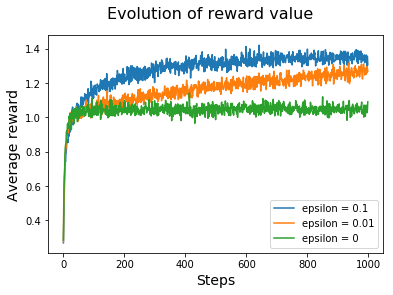

In [14]:
# Plot the evolution of reward through the time steps

fig = plt.figure()
fig.suptitle('Evolution of reward value', fontsize = 16)
plt.plot(reward1)
plt.plot(reward2)
plt.plot(reward3)
plt.xlabel('Steps', fontsize = 14)
plt.ylabel('Average reward', fontsize = 14)
plt.legend(['epsilon = 0.1', 'epsilon = 0.01', 'epsilon = 0'])

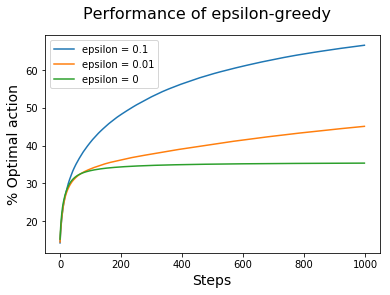

In [15]:
# Plot % Optimal action through the time steps

fig = plt.figure()
fig.suptitle('Performance of epsilon-greedy', fontsize = 16)
plt.plot(optimality1)
plt.plot(optimality2)
plt.plot(optimality3)
plt.xlabel('Steps', fontsize = 14)
plt.ylabel('% Optimal action', fontsize = 14)
plt.legend(['epsilon = 0.1', 'epsilon = 0.01', 'epsilon = 0'])